In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score


def fill_nan(dataframe):
    dataframe['precipitation'] = dataframe['precipitation'].fillna(0)
    # dataframe = dataframe.dropna()
    dataframe = dataframe.fillna(dataframe.mean())
    return dataframe

In [2]:
sample = pd.read_csv('sample_submission.csv')
sample
test_df = pd.read_csv('test.csv')
test_df
train = pd.read_csv('train.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
##함수
'''
def suck_jin_love(data):
    
    ## 데이터 전처리
    data =data.drop(["date","PM2.5","rental"],axis = 1)
    data.loc[data.precipitation.isnull() == True ,"precipitation" ] = 0
    data.loc[data.sunshine_sum.isnull() == True ,"sunshine_sum" ] = data.sunshine_sum.mean()
   
    data_ = data[data["PM10"].isnull() == False] ## PM10이 Nan이 아닌 데이터 (PM10 포함)
    
    train = data_[[ 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
        'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max']]
 

    lr= LinearRegression()
    lr.fit(train, data_.PM10)
    train_t =data[data["PM10"].isnull() == True].drop(["PM10"],axis = 1) ## PM10이 Nan인 데이터 (PM10 drop)
  
    predict = lr.predict(train_t)
    predict = pd.DataFrame(predict, index = train_t.index)
    
    return predict

##실행
res = suck_jin_love(train)
res = res.reset_index()
res.iloc[:,0]
for _ in range(0,len(res)):
        train.PM10[res.iloc[:,0][_]] = res.iloc[:,1][_]
'''

'\ndef suck_jin_love(data):\n    \n    ## 데이터 전처리\n    data =data.drop(["date","PM2.5","rental"],axis = 1)\n    data.loc[data.precipitation.isnull() == True ,"precipitation" ] = 0\n    data.loc[data.sunshine_sum.isnull() == True ,"sunshine_sum" ] = data.sunshine_sum.mean()\n   \n    data_ = data[data["PM10"].isnull() == False] ## PM10이 Nan이 아닌 데이터 (PM10 포함)\n    \n    train = data_[[ \'precipitation\', \'temp_mean\', \'temp_highest\', \'temp_lowest\',\n        \'humidity\', \'sunshine_sum\', \'sunshine_rate\',\n       \'wind_mean\', \'wind_max\']]\n \n\n    lr= LinearRegression()\n    lr.fit(train, data_.PM10)\n    train_t =data[data["PM10"].isnull() == True].drop(["PM10"],axis = 1) ## PM10이 Nan인 데이터 (PM10 drop)\n  \n    predict = lr.predict(train_t)\n    predict = pd.DataFrame(predict, index = train_t.index)\n    \n    return predict\n\n##실행\nres = suck_jin_love(train)\nres = res.reset_index()\nres.iloc[:,0]\nfor _ in range(0,len(res)):\n        train.PM10[res.iloc[:,0][_]] = res.iloc

In [4]:
num = train[train['date'] == '2020-02-29'].index
train = train.drop(num, axis=0)

In [5]:
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [6]:
date=train['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list[i]
        
        elif(i==1):
            month_+=list[i]
        elif(i==2):
            day_+=list[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
train_=train.drop(columns='date')
train_['year']=year
train_['month']=month
train_['day']=day

train_


,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


# 결측값 처리 . 
#결측값을 어디에서 어떤 식으로 했다.

In [7]:

def average(testdf):
    return round(testdf.mean(),1)
train_.isnull().sum()


precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
dtype: int64

In [8]:
#강수량 결측값 처리

In [9]:

train_['precipitation']=train_['precipitation'].fillna(0)
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [10]:
date=test_df['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list[i]
        
        elif(i==1):
            month_+=list[i]
        elif(i==2):
            day_+=list[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
test_df=test_df.drop(columns='date')
test_df['year']=year
test_df['month']=month
test_df['day']=day
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,NaN,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1
1,NaN,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2
2,NaN,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


In [11]:

test_df['precipitation']=test_df['precipitation'].fillna(0)
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


In [12]:
#일조합은 모두 일조율이 모두 0.0 그래서 nan 값 0으로 교체
sun_sum=train_[train_['sunshine_sum'].isnull()].index.tolist()
sun_sum
for i in sun_sum:
    sun_sum=train_.loc[i]
    train_.at[i,'sunshine_sum']=0.0
train_


,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [14]:

pm_w=train_[['precipitation','PM10','PM2.5','wind_mean','wind_max','rental','year','month','day']]

pm_2018=pm_w[pm_w['year']==2018]
pm_2019=pm_w[pm_w['year']==2019]
pm_2020=pm_w[pm_w['year']==2020]

'''
mean18=pm_2018['PM10'].mean()
mean19=pm_2019['PM10'].mean()
mean20=pm_2020['PM10'].mean()



train_[(train_['year']==2018)]['PM10'].fillna(mean18).tolist()
train_[(train_['year']==2018)]['PM10'].fillna(mean18)
train_[(train_['year']==2019)]['PM10'].fillna(mean19)

#train_[(train_['year']==2020)]['PM10']=train_[(train_['year']==2020)]['PM10'].fillna(mean20)


#train_[(train_['year']==2018)&(train_['PM10'])].fillna(mean18)
#19년도 9월 7일
#20년도 2월
# 31 28 31 30 31 30 31 31 30 31 30 31
#train[(train_['year']==2018)&(train_['PM10'])]
'''

"\nmean18=pm_2018['PM10'].mean()\nmean19=pm_2019['PM10'].mean()\nmean20=pm_2020['PM10'].mean()\n\n\n\ntrain_[(train_['year']==2018)]['PM10'].fillna(mean18).tolist()\ntrain_[(train_['year']==2018)]['PM10'].fillna(mean18)\ntrain_[(train_['year']==2019)]['PM10'].fillna(mean19)\n\n#train_[(train_['year']==2020)]['PM10']=train_[(train_['year']==2020)]['PM10'].fillna(mean20)\n\n\n#train_[(train_['year']==2018)&(train_['PM10'])].fillna(mean18)\n#19년도 9월 7일\n#20년도 2월\n# 31 28 31 30 31 30 31 31 30 31 30 31\n#train[(train_['year']==2018)&(train_['PM10'])]\n"

In [15]:
'''
def suck_jin_love(data):
    
    ## 데이터 전처리
    data =data.drop(["date","PM2.5","rental"],axis = 1)
    data.loc[data.precipitation.isnull() == True ,"precipitation" ] = 0
    data.loc[data.sunshine_sum.isnull() == True ,"sunshine_sum" ] = data.sunshine_sum.mean()
   
    data_ = data[data["PM10"].isnull() == False] ## PM10이 Nan이 아닌 데이터 (PM10 포함)
    
    train = data_[[ 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
        'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max']]
 

    lr= LinearRegression()
    lr.fit(train, data_.PM10)
    train_t =data[data["PM10"].isnull() == True].drop(["PM10"],axis = 1) ## PM10이 Nan인 데이터 (PM10 drop)
  
    predict = lr.predict(train_t)
'''

'\ndef suck_jin_love(data):\n    \n    ## 데이터 전처리\n    data =data.drop(["date","PM2.5","rental"],axis = 1)\n    data.loc[data.precipitation.isnull() == True ,"precipitation" ] = 0\n    data.loc[data.sunshine_sum.isnull() == True ,"sunshine_sum" ] = data.sunshine_sum.mean()\n   \n    data_ = data[data["PM10"].isnull() == False] ## PM10이 Nan이 아닌 데이터 (PM10 포함)\n    \n    train = data_[[ \'precipitation\', \'temp_mean\', \'temp_highest\', \'temp_lowest\',\n        \'humidity\', \'sunshine_sum\', \'sunshine_rate\',\n       \'wind_mean\', \'wind_max\']]\n \n\n    lr= LinearRegression()\n    lr.fit(train, data_.PM10)\n    train_t =data[data["PM10"].isnull() == True].drop(["PM10"],axis = 1) ## PM10이 Nan인 데이터 (PM10 drop)\n  \n    predict = lr.predict(train_t)\n'

In [16]:
train_.isnull().sum()

precipitation     0
temp_mean         0
temp_highest      0
temp_lowest       0
PM10             67
PM2.5            68
humidity          0
sunshine_sum      0
sunshine_rate     0
wind_mean         0
wind_max          0
rental            0
year              0
month             0
day               0
dtype: int64

In [17]:

pm18_na=pm_2018[pm_2018['PM10'].isna()]
pm19_na=pm_2019[pm_2019['PM10'].isna()]
pm20_na=pm_2020[pm_2020['PM10'].isna()]
pm18_na=pm18_na.index.tolist()
pm19_na=pm19_na.index.tolist()
pm20_na=pm20_na.index.tolist()

for i in pm18_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2020) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM10'].tolist()
    t2=(train_[(train_['year']==2019) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM10'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM10'].tolist()
    av=round((t1[0]+t2[0])/2,1)
    train_.at[i,'PM10']=av
for i in pm19_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2020) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM10'].tolist()
    t2=(train_[(train_['year']==2018) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM10'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM10'].tolist()

    av=round((t1[0]+t2[0])/2,1)
    train_.at[i,'PM10']=av
       
for i in pm20_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2019) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM10'].tolist()
    t2=(train_[(train_['year']==2018) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM10'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM10'].tolist()
    
    aav=round((t1[0]+t2[0])/2,1a
    train_.at[i,'PM10']=av
          


In [18]:
train_.isnull().sum()

precipitation     0
temp_mean         0
temp_highest      0
temp_lowest       0
PM10              0
PM2.5            68
humidity          0
sunshine_sum      0
sunshine_rate     0
wind_mean         0
wind_max          0
rental            0
year              0
month             0
day               0
dtype: int64

In [19]:

pm18_na=pm_2018[pm_2018['PM2.5'].isna()]
pm19_na=pm_2019[pm_2019['PM2.5'].isna()]
pm20_na=pm_2020[pm_2020['PM2.5'].isna()]
pm18_na=pm18_na.index.tolist()
pm19_na=pm19_na.index.tolist()
pm20_na=pm20_na.index.tolist()
av=0
for i in pm18_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2020) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM2.5'].tolist()
    t2=(train_[(train_['year']==2019) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM2.5'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM2.5'].tolist()
    
    av=round((t1[0]+t2[0])/2,1)
    train_.at[i,'PM2.5']=av
for i in pm19_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2020) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM2.5'].tolist()
    t2=(train_[(train_['year']==2018) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM2.5'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM2.5'].tolist()
    
    av=round((t1[0]+t2[0])/2,1)
    train_.at[i,'PM2.5']=av
for i in pm20_na:
    month=train_.loc[i]
    month=int(month['month'])
    day=train_.loc[i]
    day=int(day['day'])
    t1=train_[(train_['year']==2019) & (train_['month']==month)&(train_['day']==day)]
    t1=t1['PM2.5'].tolist()
    t2=(train_[(train_['year']==2018) & (train_['month']==month)&(train_['day']==day)])
    t2=t2['PM2.5'].tolist()
    t3=test_df[(test_df['month']==month)&(test_df['day']==day)]
    t3=t3['PM2.5'].tolist()
    
    av=round((t1[0]+t2[0])/2,1)
    train_.at[i,'PM2.5']=av   


In [20]:
train_.isnull().sum()
test_df.isnull().sum()

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     1
sunshine_rate    0
wind_mean        0
wind_max         0
year             0
month            0
day              0
dtype: int64

In [21]:

day = []

for i in range(0,614):
    if train_.index[i] % 7 == 0:
        day.append("Monday")
    elif train_.index[i] % 7 == 1:
        day.append("Tuesday")
    elif train_.index[i] % 7 ==2:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 3:
        day.append("Thursday")
    elif train_.index[i] % 7 == 4:
        day.append("Friday")
    elif train_.index[i] % 7 == 5:
        day.append("Saturday")
    elif train_.index[i] % 7 == 6:
        day.append("Sunday")
        
for i in range(0,len(train_.day)-614):
    if train_.index[i] % 7 == 0:
        day.append("Sunday")
    elif train_.index[i] % 7 == 1:
        day.append("Monday")
    elif train_.index[i] % 7 == 2:
        day.append("Tuesday")
    elif train_.index[i] % 7 == 3:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 4:
        day.append("Thursday")
    elif train_.index[i] % 7 == 5:
        day.append("Friday")
    elif train_.index[i] % 7 == 6:
        day.append("Saturday")

train_["day_name"] = day
#승원이 임무는 정리하자면, feature year, month_day 로 쪼개고 date 는 drop 하기. 
#결측값 처리 . 결측값을 어디에서 어떤 식으로 했다. 
#라고 정리도 해둬줘 그래야 우리도 같이 보고 피드백 하뉘까
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,day_name
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1,Monday
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2,Tuesday
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3,Wednesday
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4,Thursday
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27,Saturday
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28,Sunday
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29,Monday
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30,Tuesday


In [22]:
day2= []

for i in range(0,365):
    if test_df.index[i] % 7 == 0:
        day2.append("Friday")
    elif test_df.index[i] % 7 == 1:
        day2.append("Saturday")
    elif test_df.index[i] % 7 ==2:
        day2.append("Sunday")
    elif test_df.index[i] % 7 == 3:
        day2.append("Monday")
    elif test_df.index[i] % 7 == 4:
        day2.append("Tuesday")
    elif test_df.index[i] % 7 == 5:
        day2.append("Wednesday")
    elif test_df.index[i] % 7 == 6:
        day2.append("Thursday")

test_df["day_name"] = day2
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,day_name
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1,Friday
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2,Saturday
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3,Sunday
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4,Monday
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27,Monday
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28,Tuesday
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29,Wednesday
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30,Thursday


In [23]:
train_ = pd.get_dummies(data = train_,columns = ['day_name'])
train_

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,...,year,month,day,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,...,2018,1,1,0,1,0,0,0,0,0
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,...,2018,1,2,0,0,0,0,0,1,0
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,...,2018,1,3,0,0,0,0,0,0,1
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,...,2018,1,4,0,0,0,0,1,0,0
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,...,2018,1,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,...,2020,12,27,0,0,1,0,0,0,0
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,...,2020,12,28,0,0,0,1,0,0,0
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,...,2020,12,29,0,1,0,0,0,0,0
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,...,2020,12,30,0,0,0,0,0,1,0


In [24]:
test_df = pd.get_dummies(data = test_df,columns = ["day_name"])
test_df

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,...,year,month,day,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,...,2021,1,1,1,0,0,0,0,0,0
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,...,2021,1,2,0,0,1,0,0,0,0
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,...,2021,1,3,0,0,0,1,0,0,0
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,...,2021,1,4,0,1,0,0,0,0,0
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,...,2021,1,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,...,2021,12,27,0,1,0,0,0,0,0
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,...,2021,12,28,0,0,0,0,0,1,0
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,...,2021,12,29,0,0,0,0,0,0,1
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,...,2021,12,30,0,0,0,0,1,0,0


### 불쾌지수 열 추가

In [25]:
#0.81 * temp_df_t[i] +0.01 * temp_df_t[i]*((0.99*temp_df_t[i]) - 14.3)+ 46.3
#불쾌지수 공식(80이상 : 매우 불쾌, 80~75: 50%불쾌 , 68~75 :불쾌감 시작, 68미만: 쾌적함)
#discomfort_index

temp_df_t=train_['temp_mean'].tolist()
temp_df_h=train_['humidity'].tolist()
temp_df_t
temp_df_h

result_=[]
for i in range(len(temp_df_t)):
    result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
    result_.append(round(result,1))
result_
train_['discomfort_index']=result_


###체감온도 열 추가

In [26]:
#체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
#출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
temp_df_t=train_['temp_mean'].tolist()
temp_df_w=train_['wind_mean'].tolist()
temp_df_t
temp_df_w

result_=[]
for i in range(len(temp_df_t)):
    result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
    result_.append(round(result,1))
result_
train_.insert(4,'temp_sensible',result_)
train_
#일교차


,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,...,month,day,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,discomfort_index
0,0.0,-1.3,3.8,-5.1,-0.2,34.0,17.0,39.1,8.3,86.5,...,1,1,0,1,0,0,0,0,0,39.2
1,0.0,-1.8,1.8,-4.3,-1.3,36.0,22.0,42.0,7.9,82.3,...,1,2,0,0,0,0,0,1,0,38.1
2,0.0,-4.7,-0.4,-7.1,-4.8,31.0,19.0,42.3,8.6,88.7,...,1,3,0,0,0,0,0,0,1,34.5
3,0.0,-4.7,-0.7,-8.7,-3.8,39.0,24.0,43.0,6.2,63.9,...,1,4,0,0,0,0,1,0,0,34.3
4,0.0,-3.0,1.6,-5.6,-2.4,51.0,35.0,48.4,8.2,84.5,...,1,5,1,0,0,0,0,0,0,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,6.8,70.0,42.0,62.9,5.9,61.5,...,12,27,0,0,1,0,0,0,0,45.6
1091,1.3,6.7,11.4,4.2,8.1,66.0,44.0,72.1,8.0,83.3,...,12,28,0,0,0,1,0,0,0,46.2
1092,0.2,0.1,4.3,-6.2,-0.3,69.0,46.0,70.8,0.0,0.0,...,12,29,0,1,0,0,0,0,0,36.3
1093,0.0,-10.9,-6.2,-12.9,-13.3,39.0,15.0,55.5,8.3,86.5,...,12,30,0,0,0,0,0,1,0,23.5


In [27]:

temp_df_t=test_df['temp_mean'].tolist()
temp_df_h=test_df['humidity'].tolist()
temp_df_t
temp_df_h

result_=[]
for i in range(len(temp_df_t)):
    result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
    result_.append(round(result,1))
result_
test_df['discomfort_index']=result_


In [28]:
#체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
#출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
temp_df_t=test_df['temp_mean'].tolist()
temp_df_w=test_df['wind_mean'].tolist()
temp_df_t
temp_df_w
result_=[]
for i in range(len(temp_df_t)):
    result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
    result_.append(round(result,1))
test_df.insert(4,'temp_sensible',result_)
train_.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
test_df.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])

#일교차


### 열지수

In [29]:
'''
#HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}

temp_t_=train_['temp_mean'].tolist()
temp_h_=train_['humidity'].tolist()

#화씨로
for i in range(len(temp_t_)):
    temp_t_[i]=temp_t_[i]*9/5+32

result_=[]
for i in range(len(temp_t_)):
    result=0.5 * (temp_t_[i] + 61.0 + ((temp_t_[i]-68.0)*1.2) + (temp_h_[i]*0.094))
    result_.append(round(result,1))
result_
train_['heat_index']=result_
train_
'''

"\n#HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}\n\ntemp_t_=train_['temp_mean'].tolist()\ntemp_h_=train_['humidity'].tolist()\n\n#화씨로\nfor i in range(len(temp_t_)):\n    temp_t_[i]=temp_t_[i]*9/5+32\n\nresult_=[]\nfor i in range(len(temp_t_)):\n    result=0.5 * (temp_t_[i] + 61.0 + ((temp_t_[i]-68.0)*1.2) + (temp_h_[i]*0.094))\n    result_.append(round(result,1))\nresult_\ntrain_['heat_index']=result_\ntrain_\n"

In [30]:
'''
#HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}

temp_t_=test_df['temp_mean'].tolist()
temp_h_=test_df['humidity'].tolist()

#화씨로
for i in range(len(temp_t_)):
    temp_t_[i]=temp_t_[i]*9/5+32

result_=[]
for i in range(len(temp_t_)):
    result=0.5 * (temp_t_[i] + 61.0 + ((temp_t_[i]-68.0)*1.2) + (temp_h_[i]*0.094))
    result_.append(round(result,1))
result_
test_df['heat_index']=result_
test_df
'''

"\n#HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}\n\ntemp_t_=test_df['temp_mean'].tolist()\ntemp_h_=test_df['humidity'].tolist()\n\n#화씨로\nfor i in range(len(temp_t_)):\n    temp_t_[i]=temp_t_[i]*9/5+32\n\nresult_=[]\nfor i in range(len(temp_t_)):\n    result=0.5 * (temp_t_[i] + 61.0 + ((temp_t_[i]-68.0)*1.2) + (temp_h_[i]*0.094))\n    result_.append(round(result,1))\nresult_\ntest_df['heat_index']=result_\ntest_df\n"

In [31]:

#미세먼지 신호등
pm10=train_['PM10'].tolist()
pm2=train_['PM2.5'].tolist()
pm2
pm_=[]
for i in range(len(pm2)):
    if(pm10[i]<=30 or pm2[i]<=15):
        pm_.append(1)
    elif((pm10[i]<=80 and pm10[i]>30) or (pm2[i] >=16 and pm2[i]<=50)):
        pm_.append(2)
    elif((pm10[i]<=150 and pm10[i]>80) or  (pm2[i]>50 and pm2[i]<=100)):
        pm_.append(3)
    elif(pm10[i]>=150 or pm2[i]>100):
        pm_.append(4)
    
len(pm_)

train_['pm']=pm_
train_


,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_sum,...,day,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,discomfort_index,pm
0,0.0,-1.3,3.8,-5.1,-0.2,8.9,34.0,17.0,39.1,8.3,...,1,0,1,0,0,0,0,0,39.2,2
1,0.0,-1.8,1.8,-4.3,-1.3,6.1,36.0,22.0,42.0,7.9,...,2,0,0,0,0,0,1,0,38.1,2
2,0.0,-4.7,-0.4,-7.1,-4.8,6.7,31.0,19.0,42.3,8.6,...,3,0,0,0,0,0,0,1,34.5,2
3,0.0,-4.7,-0.7,-8.7,-3.8,8.0,39.0,24.0,43.0,6.2,...,4,0,0,0,0,1,0,0,34.3,2
4,0.0,-3.0,1.6,-5.6,-2.4,7.2,51.0,35.0,48.4,8.2,...,5,1,0,0,0,0,0,0,35.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,6.8,8.6,70.0,42.0,62.9,5.9,...,27,0,0,1,0,0,0,0,45.6,2
1091,1.3,6.7,11.4,4.2,8.1,7.2,66.0,44.0,72.1,8.0,...,28,0,0,0,1,0,0,0,46.2,2
1092,0.2,0.1,4.3,-6.2,-0.3,10.5,69.0,46.0,70.8,0.0,...,29,0,1,0,0,0,0,0,36.3,2
1093,0.0,-10.9,-6.2,-12.9,-13.3,6.7,39.0,15.0,55.5,8.3,...,30,0,0,0,0,0,1,0,23.5,1


In [32]:
#미세먼지 신호등

pm10_=test_df['PM10'].tolist()
pm2_=test_df['PM2.5'].tolist()
pm=[]
for i in range(len(pm2_)):
    if(pm10_[i]<=30 or pm2_[i]<=15):
        pm.append(1)
    elif(pm10_[i]<=80 and pm10_[i]>30 or pm2_[i] >=16 and pm2_[i]<=50):
        pm.append(2)
    elif(pm10_[i]<=150 and pm10_[i]>80 or pm2_[i]>50 and pm2_[i]<=100):
        pm.append(3)
    elif(pm10_[i]>=150 or pm2_[i]>100):
        pm.append(4)

    
test_df['pm']=pm


In [33]:
train_ = pd.get_dummies(data = train_,columns = ['pm'])
test_df = pd.get_dummies(data = test_df,columns = ['pm'])
test_df['pm_4']=0.0
test_df['pm_4']=test_df['pm_4'].astype('uint8')

In [34]:
#pip install sklearn
#anaconda search -t conda xgboost
test_df=test_df.fillna(0)

train_=train_.drop(columns='sunshine_sum')
test_df=test_df.drop(columns='sunshine_sum')
#train_=train_.drop(columns='sunshine_rate')
#test_df=test_df.drop(columns='sunshine_rate')
#new_row = train_.loc[[613]]
#train_ = pd.concat([train_.iloc[:613], new_row, train_.iloc[613:]], ignore_index = True)


In [35]:

test_df.info()
train_.info()
train_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precipitation       365 non-null    float64
 1   temp_mean           365 non-null    float64
 2   temp_highest        365 non-null    float64
 3   temp_lowest         365 non-null    float64
 4   temp_sensible       365 non-null    float64
 5   temp_diff           365 non-null    float64
 6   PM10                365 non-null    float64
 7   PM2.5               365 non-null    float64
 8   humidity            365 non-null    float64
 9   sunshine_rate       365 non-null    float64
 10  wind_mean           365 non-null    float64
 11  wind_max            365 non-null    float64
 12  year                365 non-null    int64  
 13  month               365 non-null    int64  
 14  day                 365 non-null    int64  
 15  day_name_Friday     365 non-null    uint8  
 16  day_name

,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_rate,...,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,discomfort_index,pm_1,pm_2,pm_3,pm_4
0,0.0,-1.3,3.8,-5.1,-0.2,8.9,34.0,17.0,39.1,86.5,...,0,0,0,0,0,39.2,0,1,0,0
1,0.0,-1.8,1.8,-4.3,-1.3,6.1,36.0,22.0,42.0,82.3,...,0,0,0,1,0,38.1,0,1,0,0
2,0.0,-4.7,-0.4,-7.1,-4.8,6.7,31.0,19.0,42.3,88.7,...,0,0,0,0,1,34.5,0,1,0,0
3,0.0,-4.7,-0.7,-8.7,-3.8,8.0,39.0,24.0,43.0,63.9,...,0,0,1,0,0,34.3,0,1,0,0
4,0.0,-3.0,1.6,-5.6,-2.4,7.2,51.0,35.0,48.4,84.5,...,0,0,0,0,0,35.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,6.8,8.6,70.0,42.0,62.9,61.5,...,1,0,0,0,0,45.6,0,1,0,0
1091,1.3,6.7,11.4,4.2,8.1,7.2,66.0,44.0,72.1,83.3,...,0,1,0,0,0,46.2,0,1,0,0
1092,0.2,0.1,4.3,-6.2,-0.3,10.5,69.0,46.0,70.8,0.0,...,0,0,0,0,0,36.3,0,1,0,0
1093,0.0,-10.9,-6.2,-12.9,-13.3,6.7,39.0,15.0,55.5,86.5,...,0,0,0,1,0,23.5,1,0,0,0


In [36]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train_['rental']
x= train_.drop('rental',axis =1)

In [37]:
'''
y = train_['rental']
train_ = train_.drop('rental',axis =1)

col_list = train_.columns
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        train_[f'{col_list[i]}*{col_list[j]}'] = train_[col_list[i]] * train_[col_list[j]]
col_list = test_df.columns
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        test_df[f'{col_list[i]}*{col_list[j]}'] = test_df[col_list[i]] * test_df[col_list[j]]

x = train_
'''

"\ny = train_['rental']\ntrain_ = train_.drop('rental',axis =1)\n\ncol_list = train_.columns\nfor i in range(len(col_list)):\n    for j in range(i, len(col_list)):\n        train_[f'{col_list[i]}*{col_list[j]}'] = train_[col_list[i]] * train_[col_list[j]]\ncol_list = test_df.columns\nfor i in range(len(col_list)):\n    for j in range(i, len(col_list)):\n        test_df[f'{col_list[i]}*{col_list[j]}'] = test_df[col_list[i]] * test_df[col_list[j]]\n\nx = train_\n"

In [38]:
print(x.columns)
print(test_df.columns)
print(x.shape)
print(test_df.shape)

Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'temp_sensible', 'temp_diff', 'PM10', 'PM2.5', 'humidity',
       'sunshine_rate', 'wind_mean', 'wind_max', 'year', 'month', 'day',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday', 'discomfort_index', 'pm_1', 'pm_2', 'pm_3',
       'pm_4'],
      dtype='object')
Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'temp_sensible', 'temp_diff', 'PM10', 'PM2.5', 'humidity',
       'sunshine_rate', 'wind_mean', 'wind_max', 'year', 'month', 'day',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday', 'discomfort_index', 'pm_1', 'pm_2', 'pm_3',
       'pm_4'],
      dtype='object')
(1094, 27)
(365, 27)


In [39]:

model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)
model.fit(x, y)
pred = 1.3 * model.predict(test_df)
pred

array([ 30783.186,  28205.275,  24330.67 ,  33183.336,  29523.709,
        25705.666,  20053.338,  29615.824,  24050.469,  26410.69 ,
        27968.787,  15791.498,  30108.443,  35248.41 ,  26415.139,
        26260.92 ,  24502.238,  21029.422,  28306.875,  38401.41 ,
        23030.51 ,  23430.404,  37179.234,  49374.977,  56643.45 ,
        24210.875,  42399.21 ,  22817.375,  34201.652,  31344.492,
        34801.117,  29864.361,  24906.709,  22793.174,  24427.89 ,
        36537.06 ,  29852.594,  29255.521,  33977.93 ,  32769.08 ,
        36292.883,  43406.867,  52192.754,  51376.113,  61074.055,
        23224.104,  20954.691,  12351.964,  29640.412,  42399.08 ,
        48105.824,  77799.586,  50245.508,  35631.09 ,  44475.957,
        41073.883,  73533.12 ,  76254.375,  44783.605,  23778.193,
        36580.805,  53167.18 ,  61612.523,  71345.13 ,  49182.63 ,
        55597.957,  66820.54 ,  58331.137,  68955.055,  74859.36 ,
        64135.082,  59429.254,  57203.34 ,  59309.12 ,  61371.

In [40]:

pred=pred.astype(int)
real_df=pd.read_csv('real_data.csv')
real_df

,date,rental
0,2021-01-01,22274
1,2021-01-02,23631
2,2021-01-03,21809
3,2021-01-04,32957
4,2021-01-05,29033
...,...,...
360,2021-12-27,42521
361,2021-12-28,51268
362,2021-12-29,52017
363,2021-12-30,48993


In [41]:
NMAE(real_df['rental'],pred)
#0.21858896272271897
#0.21021099544478514
#0.21021099544478514 #미세먼지 3개
#0.2123336402946476 #미세먼지 2개
#0.20955989332785 # 미세먼지 3개 수정버전
# 0.22587694892667493 불쾌지수 안넣은거
#0.21143858024293305 열지수 추가
#0.20955989332785 열 지수 빼고
#0.20759167180783422 

0.20878783183060276

In [42]:
sample['rental'] = pred
sample
sample.to_csv('6.28_seokresult.csv',index=False, encoding = 'UTF-8')

<AxesSubplot:>

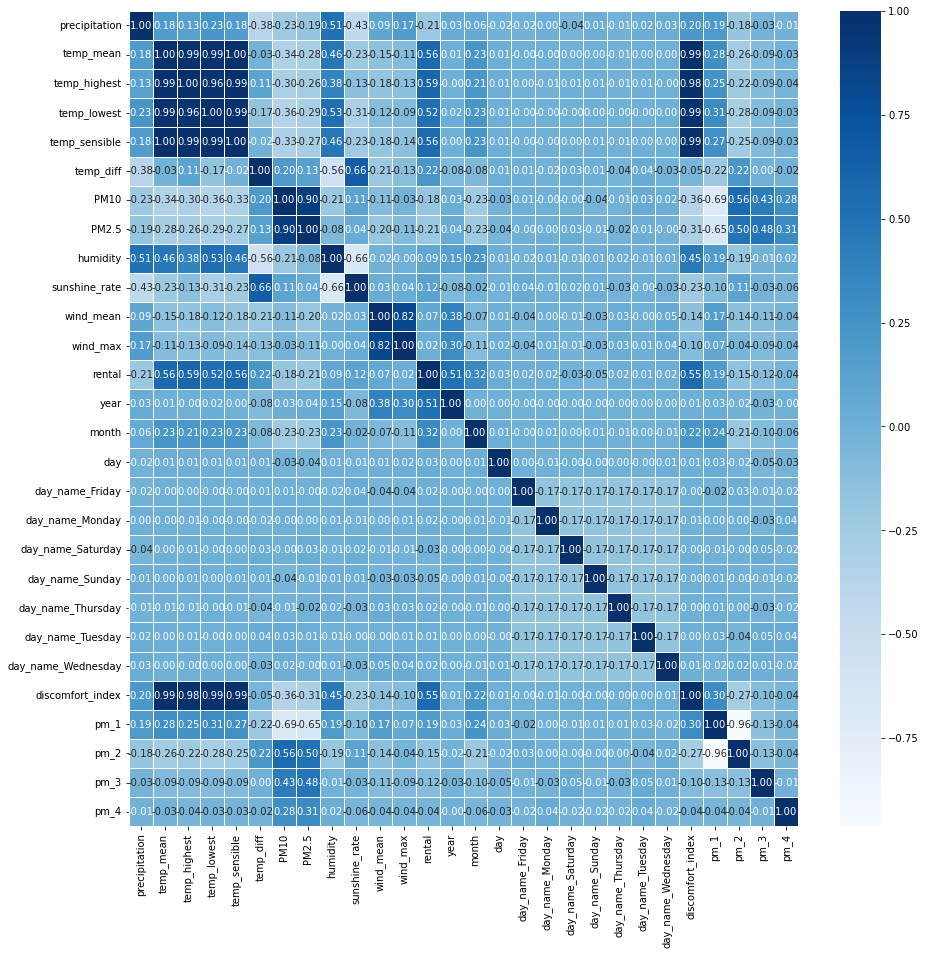

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [44]:
train_.to_csv('train_ha.csv',index=False)